In [47]:
import numpy as np
import pickle
import tensorflow as tf
from tensorflow.python.keras.backend import learning_phase
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import cv2



In [51]:
num_classes = 8

model = tf.keras.models.Sequential([
  tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(128,128, 3)),
  tf.keras.layers.Conv2D(16, 3, padding='valid', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, padding='valid', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(64, 3, padding='valid', activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(32, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(num_classes, activation='softmax')
])

def classification(x_train,y_train,model,path="../output", epochs=5, lr = 0.001, saveModel = True):
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr),
                loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                metrics=['sparse_categorical_accuracy','accuracy'])
    
    his = model.fit(x_train, y_train, epochs=epochs, validation_split=0.1)
    if saveModel:
      model.save(path+'/model')
    return his

def loadData(path="../output"):
    '''
    Loads the data to be used by the classifiers
    '''
    pickle_in = open(path+"/X.pickle", "rb")
    X = pickle.load(pickle_in)
    pickle_in = open(path+"/y.pickle", "rb")
    y = pickle.load(pickle_in)
    pickle_in = open(path+"/data.pickle", "rb")
    data = pickle.load(pickle_in)

    return X,y,data

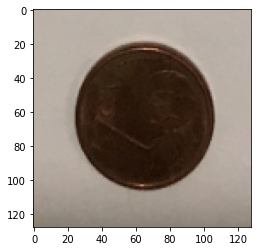

Training Size: 1032
Testing  Size: 259


In [52]:
X,y,_ = loadData()
plt.imshow(cv2.cvtColor(X[3], cv2.COLOR_BGR2RGB))
plt.show()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('Training Size:', len(X_train))
print('Testing  Size:', len(X_test))

In [50]:
his = []
ep = [15]
lr = [0.001, 0.005, 0.01]
for e in ep:
    for l in lr:
        h = classification(np.asarray(X_train),np.asarray(y_train),model, epochs=e, lr=l, saveModel=False)
        his.append(h)

Epoch 1/15
 8/29 [=======>......................] - ETA: 4s - loss: 1.9521 - sparse_categorical_accuracy: 0.2148 - accuracy: 0.2148

KeyboardInterrupt: 

In [53]:
results = model.evaluate(np.asarray(X_test),np.asarray(y_test))
print(results)

RuntimeError: You must compile your model before training/testing. Use `model.compile(optimizer, loss)`.

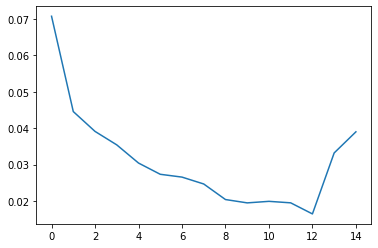

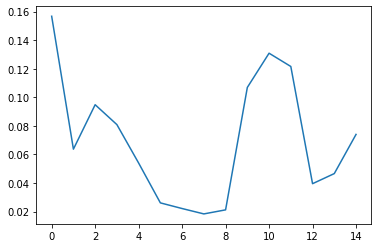

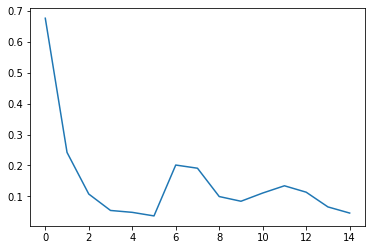

In [ ]:
best = []
for h in his:
    plt.plot(range(len(h.history['loss'])),h.history['loss'])
    plt.show()
    a = np.array(h.history['loss'])
    best.append([np.where(a == a.min())[0][0],a.min()])



In [ ]:
best

[[12, 0.016459407284855843],
 [7, 0.018308615311980247],
 [5, 0.03680339828133583]]

In [55]:
classification(np.asarray(X_train),np.asarray(y_train),model, epochs=10, lr=0.001, saveModel=True, path='../output')

Epoch 1/10
29/29 [==============================] - 6s 209ms/step - loss: 0.3360 - sparse_categorical_accuracy: 0.8804 - accuracy: 0.8804 - val_loss: 0.3477 - val_sparse_categorical_accuracy: 0.8654 - val_accuracy: 0.8654
Epoch 2/10
29/29 [==============================] - 6s 206ms/step - loss: 0.2413 - sparse_categorical_accuracy: 0.9170 - accuracy: 0.9170 - val_loss: 0.2658 - val_sparse_categorical_accuracy: 0.8942 - val_accuracy: 0.8942
Epoch 3/10
29/29 [==============================] - 6s 200ms/step - loss: 0.2082 - sparse_categorical_accuracy: 0.9213 - accuracy: 0.9213 - val_loss: 0.2986 - val_sparse_categorical_accuracy: 0.8942 - val_accuracy: 0.8942
Epoch 4/10
29/29 [==============================] - 6s 194ms/step - loss: 0.1941 - sparse_categorical_accuracy: 0.9300 - accuracy: 0.9300 - val_loss: 0.2813 - val_sparse_categorical_accuracy: 0.9327 - val_accuracy: 0.9327
Epoch 5/10
29/29 [==============================] - 5s 188ms/step - loss: 0.1815 - sparse_categorical_accuracy: 